In [1]:
#Convex Hull plots for the paper [Combining uncertainty with electricity and gas sector coupling – worth the effort?]
#Iegor Riepin, 04.04.2020

In [2]:
from scipy.spatial import ConvexHull

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Arc

import seaborn as sns
sns.set()

In [3]:
#Loading and reviewing data:
defdata = pd.read_csv("Hull_input.csv")
defdata.head()

,Mode,Year,Scenario,Scenario branch,Technology,VC
0,Gas Dem,2020,EUCO,EUCO,Lignite,23.8
1,Gas Dem,2020,EUCO,EUCO,Hard Coal,38.6
2,Gas Dem,2020,EUCO,EUCO,CCGT,30.5
3,Gas Dem,2020,EUCO,EUCO,OCGT,47.1
4,Gas Dem,2020,EUCO,ST,Lignite,23.8


In [4]:
#Now we isolate parametric uncertainty by creating new dataframes:
GasDem = defdata.loc[(defdata['Mode'] == 'Gas Dem')]
CO2Price = defdata.loc[(defdata['Mode'] == 'CO2 Price')]
FuelPrice = defdata.loc[(defdata['Mode'] == 'Fuel Price')]

In [5]:
#To test, we pick only EUCO scenario, so we’ll create again a new dataframe for it:
GasDem_EUCO = GasDem.loc[(GasDem['Scenario'] == 'EUCO')]
GasDem_EUCO.head()

,Mode,Year,Scenario,Scenario branch,Technology,VC
0,Gas Dem,2020,EUCO,EUCO,Lignite,23.8
1,Gas Dem,2020,EUCO,EUCO,Hard Coal,38.6
2,Gas Dem,2020,EUCO,EUCO,CCGT,30.5
3,Gas Dem,2020,EUCO,EUCO,OCGT,47.1
4,Gas Dem,2020,EUCO,ST,Lignite,23.8


In [6]:
#Creating an array of poitns to plot:
defpoints = GasDem_EUCO[['Year', 'VC']].values
defpoints[:5]

array([[2020. ,   23.8],
       [2020. ,   38.6],
       [2020. ,   30.5],
       [2020. ,   47.1],
       [2020. ,   23.8]])

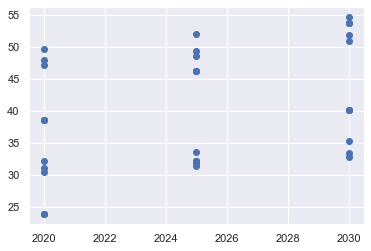

In [7]:
#Creating a convex hull around points:
hull = ConvexHull(GasDem_EUCO[['Year','VC']])
plt.plot(GasDem_EUCO.Year, GasDem_EUCO.VC, 'o')

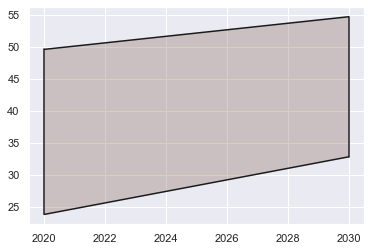

In [8]:
#Loop through each of the hull's simplices
for simplex in hull.simplices:
    #Draw a black line between each
    plt.plot(defpoints[simplex, 0], defpoints[simplex, 1], 'k-')
    plt.fill(defpoints[hull.vertices,0], defpoints[hull.vertices,1],  'o-', alpha=0.1)

In [9]:
#Creating an array of technologies that are to be depicted by hulls:
Techs = GasDem_EUCO["Technology"].unique()
Techs

array(['Lignite', 'Hard Coal', 'CCGT', 'OCGT'], dtype=object)

In [10]:
#Assigning colors:
Colors = {'Lignite': '#8b4513', 'Hard Coal': '#707070', 'CCGT': '#FFA500','OCGT': '#FAF31B'}

In [11]:
#Defining all four scenarios for the major loop:
scens = GasDem["Scenario"].unique()
scens

array(['EUCO', 'ST', 'DG', 'EVP'], dtype=object)

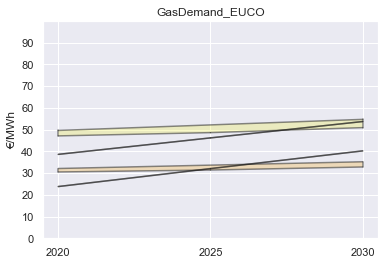

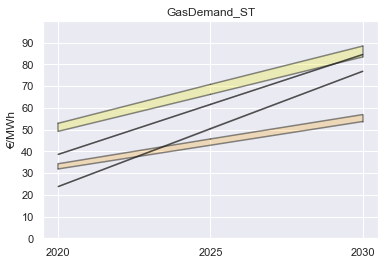

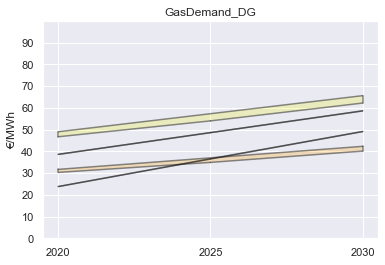

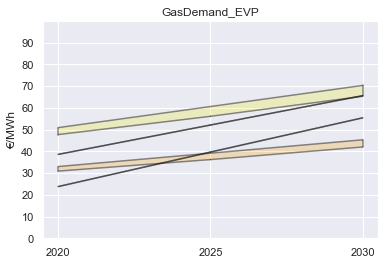

In [12]:
#The major loop for creating hulls per tech and scenario
#also we add some display optios for the sake of clarity and beauty

for scen in scens:
    GasDem_temp = GasDem.loc[(GasDem['Scenario'] == scen)]
        
    plt.figure()
    
    plt.xticks([2020,2025, 2030])
    plt.yticks(range(0,100,10))
    axes = plt.gca()
    axes.set_ylim(0,100)
    axes.set_ylabel('€/MWh')
    
    #For each Technology
    for Tech in Techs:
    
        #Create a new dataframe for the technologies
        df = GasDem_temp[(GasDem_temp.Technology == Tech)]
    
        #Create an array of the x/y coordinate groups
        points = df[['Year', 'VC']].values

        #If there are enough points for a hull, create it. If there's an error, forget about it
        try:
            hull = ConvexHull(df[['Year','VC']])
        
        except:
            pass
    
        #If we created the hull, draw the lines and fill with 5% transparent color. If there's an error, forget about it

        try:    
            for simplex in hull.simplices:
                axes.set_title("GasDemand_"+scen)
                plt.plot(points[simplex, 0], points[simplex, 1], 'k-', alpha=0.5, markersize=0)
                plt.fill(points[hull.vertices,0], points[hull.vertices,1], Colors[Tech], alpha=0.05)
            
        except:
            pass
        
    plt.show()


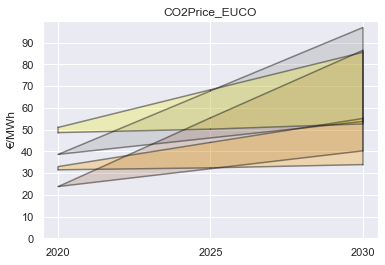

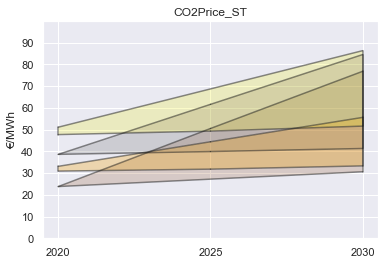

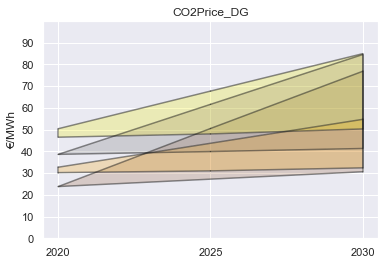

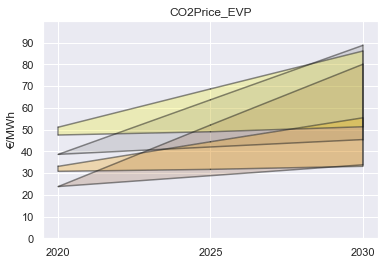

In [13]:
#The major loop for creating hulls per tech and scenario
#also we add some display optios for the sake of clarity and beauty

for scen in scens:
    CO2Price_temp = CO2Price.loc[(CO2Price['Scenario'] == scen)]
    
    plt.figure()
    
    plt.xticks([2020,2025, 2030])
    plt.yticks(range(0,100,10))
    axes = plt.gca()
    axes.set_ylim(0,100)
    axes.set_ylabel('€/MWh')
    
    #For each Technology
    for Tech in Techs:
    
        #Create a new dataframe for the technologies
        df = CO2Price_temp[(CO2Price_temp.Technology == Tech)]
    
        #Create an array of the x/y coordinate groups
        points = df[['Year', 'VC']].values

        #If there are enough points for a hull, create it. If there's an error, forget about it
        try:
            hull = ConvexHull(df[['Year','VC']])
        
        except:
            pass
    
        #If we created the hull, draw the lines and fill with 5% transparent color. If there's an error, forget about it

        try:    
            for simplex in hull.simplices:
                axes.set_title("CO2Price_"+scen)
                plt.plot(points[simplex, 0], points[simplex, 1], 'k-', alpha=0.5, markersize=0)
                plt.fill(points[hull.vertices,0], points[hull.vertices,1], Colors[Tech], alpha=0.05)
        except:
            pass
    
    plt.show()
    #plt.savefig(CO2Price+scen+".png")

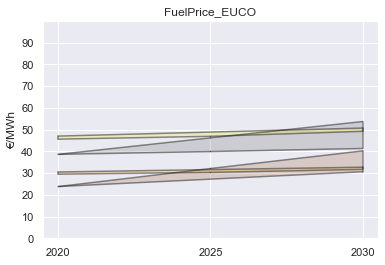

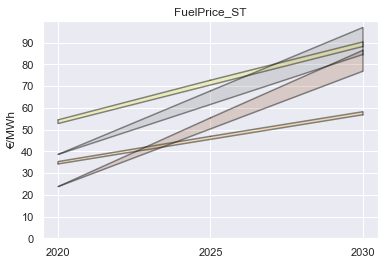

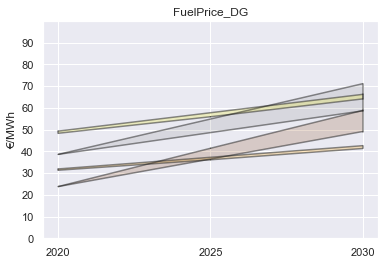

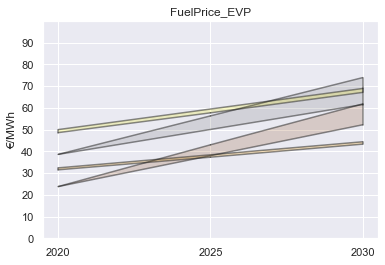

In [14]:
#The major loop for creating hulls per tech and scenario
#also we add some display optios for the sake of clarity and beauty

for scen in scens:
    FuelPrice_temp = FuelPrice.loc[(FuelPrice['Scenario'] == scen)]
  
    plt.figure()
    
    plt.xticks([2020,2025, 2030])
    plt.yticks(range(0,100,10))
    axes = plt.gca()
    axes.set_ylim(0,100)
    axes.set_ylabel('€/MWh')
    
    #For each Technology
    for Tech in Techs:
    
        #Create a new dataframe for the technologies
        df = FuelPrice_temp[(FuelPrice_temp.Technology == Tech)]
    
        #Create an array of the x/y coordinate groups
        points = df[['Year', 'VC']].values

        #If there are enough points for a hull, create it. If there's an error, forget about it
        try:
            hull = ConvexHull(df[['Year','VC']])
        
        except:
            pass
    
        #If we created the hull, draw the lines and fill with 5% transparent color. If there's an error, forget about it

        try:    
            for simplex in hull.simplices:
                axes.set_title("FuelPrice_"+scen)
                plt.plot(points[simplex, 0], points[simplex, 1], 'k-', alpha=0.5, markersize=0)
                plt.fill(points[hull.vertices,0], points[hull.vertices,1], Colors[Tech], alpha=0.05)
        except:
            pass
    
    plt.show()